In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import statistics 
import math
from scipy.stats import multinomial
from scipy.stats import dirichlet
from scipy.special import gamma
import time
from numpy import trapz
f = open("K1.txt", "r")
K1 = np.zeros(601)
for i in range(601):
    K1[i] = f.readline()
    

f.close()
statistics.mean(K1)

0.6210108236272879

Text(0.5, 1.0, 'alpha1')

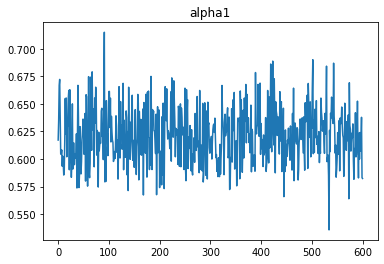

In [2]:
import matplotlib
plt.plot(K1)
matplotlib.pyplot.title('alpha1')


In [3]:
g = open("K2.txt", "r")
K2 = np.zeros(601)
for j in range(601):
    K2[j] = g.readline()
    

g.close()
statistics.mean(K2)

0.23795066389351083

Text(0.5, 1.0, 'alpha2')

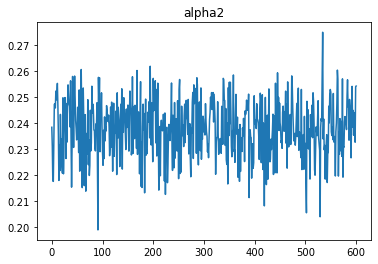

In [4]:
plt.plot(K2)
matplotlib.pyplot.title('alpha2')

In [5]:
h = open("K3.txt", "r")
K3 = np.zeros(601)
for k in range(601):
    K3[k] = h.readline()
    

h.close()
statistics.mean(K3)

0.14103850282861896

In [6]:
statistics.mean(K1)+statistics.mean(K2)+statistics.mean(K3)

0.9999999903494177

In [ ]:
a1 = np.zeros(len(K1));a2 = np.zeros(len(K1));a3 = np.zeros(len(K1))
for l in range(len(K1)):
    A = np.random.dirichlet([K1[l],K2[l],K3[l]],1)
    a1[l]= A[0,0]
    a2[l]= A[0,1]
    a3[l]= A[0,2]

In [ ]:
plt.plot(K3)
matplotlib.pyplot.title('alpha3')

In [ ]:
plt.hist(K1, density=True)

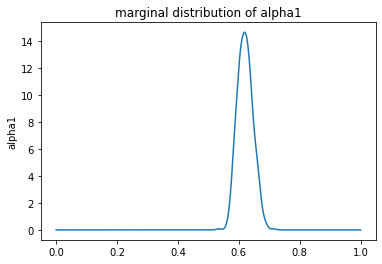

0.6196196196196196

In [7]:
import matplotlib
density = gaussian_kde(K1,bw_method=2401**(-1/7))
xs = np.linspace(0,1,1000)
plt.plot(xs,density(xs))
matplotlib.pyplot.title('marginal distribution of alpha1')
plt.ylabel('alpha1')
#plt.plot(K1,np.exp(-K3))
plt.show()
#statistics.mode(Kth_1)
a = (density(xs))
i = list(a).index(max(density(xs))) 
i
xs[i]

In [8]:
print(density(xs[i+4]))
print(xs[i+4])

[14.4712466]
0.6236236236236237


In [9]:
area=trapz(a,xs,dx=.1)
print(area)

1.0


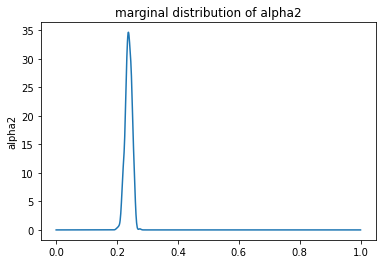

0.23723723723723725

In [10]:
density = gaussian_kde(K2,bw_method=2401**(-1/7))
xs = np.linspace(0,1,1000)
plt.plot(xs,density(xs))
matplotlib.pyplot.title('marginal distribution of alpha2')
plt.ylabel('alpha2')
#plt.plot(K1,np.exp(-K3))
plt.show()
#statistics.mode(Kth_1)
b = (density(xs))
i = list(b).index(max(density(xs))) 
i
xs[i]

In [11]:
area=trapz(b,xs,dx=.1)
print(area)

0.9999999999999999


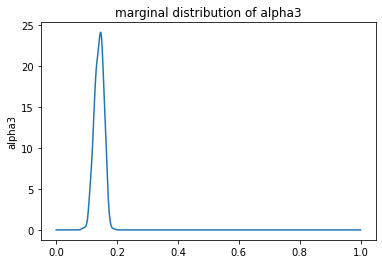

0.14614614614614616

In [12]:
density = gaussian_kde(K3,bw_method=2401**(-1/7))
xs = np.linspace(0,1,1000)
plt.plot(xs,density(xs))
matplotlib.pyplot.title('marginal distribution of alpha3')
plt.ylabel('alpha3')
#plt.plot(K1,np.exp(-K3))
plt.show()
#statistics.mode(Kth_1)
c = (density(xs))
i = list(c).index(max(density(xs))) 
i
xs[i]

In [13]:
area=trapz(c,xs,dx=.1)
print(area)

1.0


In [14]:
0.6196196196196196+0.14614614614614616+0.23723723723723725

1.003003003003003

In [ ]:
numa = 100
alpha_1 = K1;alpha_2 = K2;alpha_3 = K3
x_i1 = np.zeros(2401);x_i2 = np.zeros(2401);x_i3 = np.zeros(2401)
xm_1 = np.zeros(numa); xm_2 = np.zeros(numa);xm_3 = np.zeros(numa)
x1 = np.linspace(0,1,numa)
x2 = np.linspace(0,1,numa)
x3 = np.linspace(0,1,numa)
stda = np.std(alpha_1)
stdb = np.std(alpha_2)
stdc = np.std(alpha_3)
z1 = np.zeros(len(x1))
C1 = (stda/(2401**(1/(3+4))))**.2
C2 = (stdb/(2401**(1/(3+4))))**.2
C3 = (stdc/(2401**(1/(3+4))))**.2
for loop in range(numa):
    for loop2 in range(2401):
        x_i1[loop2]=x1[loop]-alpha_1[loop2]
        x_i2[loop2]=x2[loop]-alpha_2[loop2]
        x_i3[loop2]=x3[loop]-alpha_3[loop2]
    xm_1[loop] = np.mean(np.exp(-.5*(x_i1/C1)**2))*(2*np.pi)**(-1.5)*C1**(-3)
    xm_2[loop] = np.mean(np.exp(-.5*(x_i2/C2)**2))*(2*np.pi)**(-1.5)*C2**(-3)
    xm_3[loop] = np.mean(np.exp(-.5*(x_i3/C3)**2))*(2*np.pi)**(-1.5)*C3**(-3)
    

In [ ]:
import matplotlib
plt.plot(x1,xm_1)
matplotlib.pyplot.title('marginal distribution of alpha1')
plt.ylabel('alpha1')
ind = list(xm_1).index(max(xm_1))
x1[ind]
#print((xm_1[ind]))
#print(ind)

In [ ]:
plt.plot(x2,xm_2)
matplotlib.pyplot.title('marginal distribution of alpha2')
plt.ylabel('alpha2')
ind = list(xm_2).index(max(xm_2))
x2[ind]

In [ ]:
plt.plot(x3,xm_3)
matplotlib.pyplot.title('marginal distribution of alpha3')
plt.ylabel('alpha3')
ind = list(xm_3).index(max(xm_3))
x3[ind]

In [ ]:
x=[1,2, 3, 4]
import numpy as np
np.mean(x)

In [ ]:
mean1 = np.mean(K1); mean2 = np.mean(K2); mean3 = np.mean(K3)
acf = np.zeros(len(K1)); acf1 = np.zeros(len(K1));acf2 = np.zeros(len(K1))
acfd1 = np.zeros(len(K1)); acfd2 = np.zeros(len(K1));acfd3 = np.zeros(len(K1))
t = 100
pl1 = np.zeros(t);pl2 = np.zeros(t);pl3 = np.zeros(t)
for kc in range(t):
    for i in range(len(K1)-kc):
        acf[i] = ((K1[i]-mean1)*(K1[i+kc]-mean1))
        acf1[i] = ((K2[i]-mean2)*(K2[i+kc]-mean2))
        acf2[i] = ((K3[i]-mean3)*(K3[i+kc]-mean3))
    #if(acf[i]<0):
        #acf[i]=-acf[i]
    ac1 = sum(acf)
    ac2 = sum(acf1)
    ac3 = sum(acf2)
    for j in range(len(K1)):
        acfd1[j]=(K1[j]-mean1)**2
        acfd2[j]=(K2[j]-mean2)**2
        acfd3[j]=(K3[j]-mean3)**2
    ad1 = sum(acfd1) 
    ad2 = sum(acfd2) 
    ad3 = sum(acfd3) 
    pl1[kc]=ac1/ad1*((len(K1)-1)/(len(K1)-kc))
    pl2[kc]=ac2/ad2*((len(K1)-1)/(len(K1)-kc))
    pl3[kc]=ac3/ad3*((len(K1)-1)/(len(K1)-kc))
    

In [ ]:
from pylab import *
n = np.arange(100)
#subplot(3,1,1)
plt.stem(n,pl1)
plt.show()
plt.stem(n,pl2)
plt.show()
plt.stem(n,pl3)

In [ ]:
K1

In [ ]:
from scipy import stats
x1, x2, x3 = np.mgrid[0:1:10j, 0:1:10j,0:1:10j]
#x3=np.linspace(0,1,10000)
positions = np.vstack([x1.ravel(), x2.ravel(),x3.ravel()])
#Position=np.vstack([x1,x2,x3])
values = np.vstack([K1, K2, K3])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T,x1.shape)

In [ ]:
plt.plot(x1.ravel(),Z)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import statistics 
import math
from scipy.stats import multinomial
from scipy.stats import dirichlet
from scipy.special import gamma
import time


In [ ]:
def a1(a):
    u = np.random.uniform(0,1,1)
    
    b = (np.exp(1) + a)/(np.exp(1))
    p = b*u
    if(p > 1):
        x1 = case2(a, b, p)
    else:
        x1 = case1(a, p)
    return x1
        
def case2(a, b, p):
    x = -np.log((b - p)/a)
    up = np.random.uniform(0,1,1)
    if(up > x**(a-1)):
        a1(a)
    else:
        if(x >0.0000000001):
            
            return x
        else:
            
            a1(a)
            
        
    
def case1(a,p):
    x = p**(1/a)
    up1 = np.random.uniform(0,1,1)
    if(up1 > np.exp(-x)):
        a1(a)
    else:
        
        
        if(x >0.0000000001):
            
            
            return x
        else:
            
            a1(a)
        
    
    
    
    

In [ ]:
y = np.zeros(400)
#result = np.zeros(1000)
for i in range(400):
    y[i] = a1(0.01)
#result = y[np.logical_not(np.isnan(y))]

In [ ]:
y

In [ ]:
density = gaussian_kde(result)
xs = np.linspace(0,0.2,500)
plt.plot(xs,density(xs))
plt.ylabel('alpha3')
#plt.plot(K1,np.exp(-K3))
plt.show()
#statistics.mode(Kth_1)
a = (density(xs))
i = list(a).index(max(density(xs))) 
i
xs[i]

In [ ]:
c = np.random.gamma(0.01,1,400000)


In [ ]:
density = gaussian_kde(c)
xs = np.linspace(0,0.2,500)
plt.plot(xs,density(xs))
plt.ylabel('alpha3')
#plt.plot(K1,np.exp(-K3))
plt.show()
#statistics.mode(Kth_1)
a = (density(xs))
i = list(a).index(max(density(xs))) 
i
xs[i]

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
mu=np.array([1,10,20])
sigma=np.matrix([[4,0,0],[0,25,0],[0,0,100]])
data=np.random.multivariate_normal(mu,sigma,1000)
values = data.T
kde = stats.gaussian_kde(values)
xs = np.linspace(0,20,500)
plt.plot(xs,kde(xs))

In [ ]:
kde

In [ ]:
plt.plot(result)

In [ ]:
plt.plot(c)

In [ ]:
min(c)

In [ ]:
gamma(.9)

In [ ]:
#Fishman 1976 method 1
num = 80000
X = np.zeros(num)
for i in range(num):
    
    n = np.random.normal(0,1,1)
    u1 = np.random.uniform(0,1,1)
    if(u1 <= n/(np.exp(n+1)**(1-1))):
        
        x = 0.5*n
       
        
    X[i] = x    